In [1]:

from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI
from pydantic_ai.models.google import GoogleModel
from pydantic_ai.providers.google import GoogleProvider
load_dotenv()
import logfire


google_api_key=os.getenv('google_api_key')
pse=os.getenv('pse')
openai_api_key=os.getenv('openai_api_key')
composio_api_key=os.getenv('composio_api_key')


In [2]:
logfire_token=os.getenv('logfire_token')

In [3]:
import logfire
logfire.configure(token=logfire_token)
logfire.instrument_pydantic_ai()


In [4]:
api_keys={
    'google_api_key':google_api_key,
    'pse':pse,
    'openai_api_key':openai_api_key,
    'composio_key':composio_api_key
}


In [5]:
llms={'pydantic_llm':GoogleModel('gemini-2.5-flash-preview-05-20', provider=GoogleProvider(api_key=api_keys['google_api_key'])),
              'langchain_llm':ChatGoogleGenerativeAI(google_api_key=api_keys['google_api_key'], model='gemini-2.0-flash', temperature=0.3),
              'openai_llm':ChatOpenAI(api_key=api_keys['openai_api_key'])}

Logfire project URL: ]8;id=534385;https://logfire-us.pydantic.dev/padioutristan/google-agent\https://logfire-us.pydantic.dev/padioutristan/google-agent]8;;\

In [6]:
from google_agent import Google_agent
from composio_langgraph import Action, ComposioToolSet, App

In [7]:
toolset=ComposioToolSet(api_key=api_keys['composio_key'])


In [8]:
google_agent=Google_agent(llms,api_keys,toolset)

c:\Users\trist\OneDrive\Desktop\important\ai_portfolio\Google_AI_Agent\.venv\Lib\site-packages\composio\client\collections.py:1183: UserWarning: Using all actions of an app is not recommended for production.Learn more: https://docs.composio.dev/patterns/tools/use-tools/use-specific-actions

Give Feedback / Get Help:
    On GitHub: https://github.com/ComposioHQ/composio/issues/new
    On Discord: https://dub.composio.dev/discord
    On Email: tech@composio.dev
    Talk to us on Intercom: https://composio.dev
    Book a call with us: https://composio.dev/redirect?url=https://calendly.com/composiohq/support?utm_source=py-sdk-logs&utm_campaign=calendly
If you need to debug this error, set `COMPOSIO_LOGGING_LEVEL=debug`.
  warnings.warn(
c:\Users\trist\OneDrive\Desktop\important\ai_portfolio\Google_AI_Agent\.venv\Lib\site-packages\composio\client\collections.py:1183: UserWarning: Using all actions of an app is not recommended for production.Learn more: https://docs.composio.dev/patterns/too

In [13]:
res=google_agent.chat('find events in this year using the calendar tool')

14:10:20.034 run graph None
14:10:20.035   run node Agent_node
14:10:20.041     plan_agent run
14:10:20.042       chat gemini-2.5-flash-preview-05-20
14:10:24.337   run node router_node
14:10:24.338   run node calendar_manager_node
14:10:27.805   run node Agent_node
14:10:27.814     plan_agent run
14:10:27.815       chat gemini-2.5-flash-preview-05-20
14:10:30.595   run node router_node
14:10:30.596   run node calendar_manager_node
14:10:34.135   run node Agent_node
14:10:34.140     plan_agent run
14:10:34.141       chat gemini-2.5-flash-preview-05-20
14:10:36.324   run node router_node


In [14]:
res


State(node_messages_dict={'agent_node': plan_shema(tasks=[task_shema(task_status='completed', task_reason='All events for the current year have been retrieved. Now, the events need to be formatted and displayed to the user.', task='Aggregate and display all retrieved events to the user.')], manager_tool='End', action='End', task='End'), 'Calendar Manager': {'GOOGLECALENDAR_GET_CURRENT_DATE_TIME': {'data': {'current_datetime': '2025-06-11T14:04:23.817309+00:00', 'yyyymmdd_datetime': '2025,6,11,14,4,23'}, 'error': None, 'successfull': True, 'successful': True, 'logId': 'log_yRWtPiDxUZZ4'}, 'GOOGLECALENDAR_FIND_EVENT': {'data': {'current_datetime': '2025-06-11T14:04:27.451077+00:00', 'yyyymmdd_datetime': '2025,6,11,14,4,27'}, 'error': None, 'successfull': True, 'successful': True, 'logId': 'log_lRCJCAOb65tw'}, 'continue': {'data': {'event_data': {'event_data': [{'attendees': [{'displayName': 'GoodTime Sync', 'email': 'c_vfkq4o5gq7l3h275g6ct7ekr7g@group.calendar.google.com', 'responseStatu

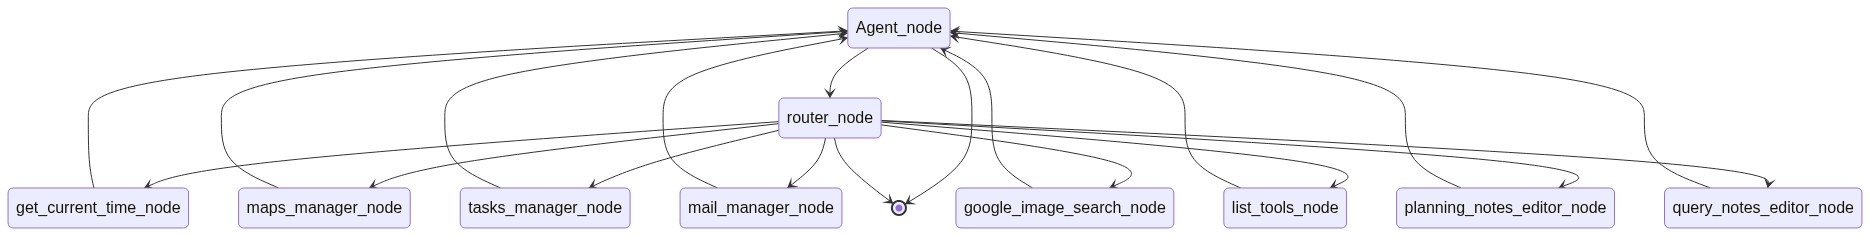

In [9]:
google_agent.display_graph()

In [19]:
list(res.node_messages.keys())[-1]res

'Get_current_time'

In [11]:
google_agent.tool_functions

{'managers': {'Mail Manager': {'actions': {'GMAIL_DELETE_DRAFT': {'description': "Delete an email draft using gmail's api."},
    'GMAIL_DELETE_MESSAGE': {'description': "Delete an email message using gmail's api. note: this action requires the integration to have the `https://mail.google.com/` scope."},
    'GMAIL_FETCH_EMAILS': {'description': 'Action to fetch all emails from gmail.'},
    'GMAIL_GET_CONTACTS': {'description': 'Action to get info of contacts saved in google for an authorized account. a custom integration with `https://www.googleapis.com/auth/contacts.readonly` scope is required to use this action.'},
    'GMAIL_LIST_DRAFTS': {'description': "List all email drafts using gmail's api."},
    'GMAIL_MOVE_TO_TRASH': {'description': "Move an email message to trash using gmail's api."},
    'GMAIL_REPLY_TO_THREAD': {'description': 'Action to reply to an email thread in gmail.'},
    'GMAIL_SEARCH_PEOPLE': {'description': "Provides a list of contacts in the authenticated use

In [13]:
[{'managers':{i:{'actions':list(res.node_messages_dict.get(i).keys())}}} for i in list(res.node_messages_dict.keys())]

[{'managers': {'List_tools': {'actions': ['list_tools']}}},
 {'managers': {'Get_current_time': {'actions': ['get_current_time']}}}]

In [11]:
state=google_agent.state.mail_inbox

In [21]:
state['data']['messages'][1]

{'attachmentList': [],
 'labelIds': ['CATEGORY_PROMOTIONS', 'UNREAD', 'INBOX'],
 'messageId': '1919b342589c8ff6',
 'messageText': 'Squarespace Circle Included with your plan  \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \n\u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \n\u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \n\u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \n\u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \u2007͏ \

In [19]:
inbox=[]
for i in state['data']['messages']:
    mail={'message_id':i.get('messageId'),'thread_id':i.get('threadId'),'subject':i.get('subject'),'sender':i.get('sender'),'date':i.get('messageTimestamp'),'snippet':i.get('preview'), 'messageText':i.get('messageText')}
    inbox.append(mail)












In [20]:
inbox

[{'message_id': '196673e23a022b67',
  'thread_id': '196673e23a022b67',
  'subject': 'Why send cold email?',
  'sender': 'Apollo <hello@mail.apollo.io>',
  'date': '2025-04-24T10:00:47Z',
  'snippet': {'body': 'There&#39;s a good reason why 59% of companies say cold email is their most reliable lead gen channel. ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ Apollo Why',
   'subject': 'Why send cold email?'},
  'messageText': "Apollo ( https://app.apollo.io/?utm_campaign=2501_LC_Onboarding_FreeUsers&utm_content=12_WhySendColdEmail_FreeUsers&utm_medium=email&utm_source=cio )\r\nWhy send cold email? ( https://www.apollo.io/academy/learn/how-to-send-cold-emails-in-apollo?utm_campaign=2501_LC_Onboarding_FreeUsers&utm_content=12_WhySendColdEmail_FreeUsers&utm_medium=email&utm_source=cio )\r\n\r\n********************\r\nWhy send cold email?\r\n********************\r\n\r\nThere's a good reason why 59% of companies say cold email is their most reliable lead 